In [73]:
import pandas as pd 
from PIL import Image
import numpy as np
data_test_small = pd.read_csv('./MNIST_test_small.csv')
data_train_small = pd.read_csv('./MNIST_train_small.csv')

X_train = np.matrix(data_train_small)
y_temp = X_train[:, 0]
print(y_temp.shape)
y_train = []
for i in range(len(y_temp)):
    y_train.append(y_temp[i].item(0))
y_train = np.asarray(y_train)
X_train = np.delete(X_train, 0, 1)
print(X_train.shape)

X_test = np.matrix(data_test_small)
y_temp = X_test[:, 0]
y_test = []
for i in range(len(y_temp)):
    y_test.append(y_temp[i].item(0))
y_test = np.asarray(y_test)
X_test = np.delete(X_test, 0, 1)


test = []
for i in range(len(X_train)):
    temp = np.transpose(X_train[i])
    img = []
    for j in range(len(temp)):
        img.append(temp[j].item(0))
    img = np.asarray(img)
    test.append(img)
test = np.asarray(test)
X_train = test


test2 = []
for i in range(len(X_test)):
    temp = np.transpose(X_test[i])
    img = []
    for j in range(len(temp)):
        img.append(temp[j].item(0))
    img = np.asarray(img)
    test2.append(img)
test2 = np.asarray(test2)
X_test = test2
print(X_test.shape)

(2999, 1)
(2999, 784)
(999, 784)


In [ ]:
import matplotlib.pyplot as plt

def plot_digit(placement, train_test=True):
    if train_test:
        # The rest of columns are pixels
        pixels = X_train[placement]

        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype='uint8')

        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))

        # Plot
        plt.title('Diget nr. {placement}. Label is {label}'.format(label=y_train[placement], placement=placement))
        plt.imshow(pixels, cmap='gray')
        plt.show()
    else:
        pixels = X_test[placement]
        pixels = np.array(pixels, dtype='uint8')
        pixels = pixels.reshape((28, 28))

        plt.title('Diget nr. {placement}. Label is {label}'.format(label=y_test[placement], placement=placement))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        
plot_digit(0, True)


In [ ]:
def get_dist(i_train, X_pred):
    dist = np.linalg.norm(i_train-X_pred)
    return dist

def predict(X_pred, k):
    dists = []
    for i in X_train:
        dists.append(get_dist(i, X_pred))
    
    idx = np.argpartition(dists, k)
    votes = []
    for i in range(k):
        votes.append(y_train[idx[i]])
        
    #plot_digit(0, False)
    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    return result

def KNN(X_data, y_data, k):
    num_errors = 0
    for i in range(len(X_data)):
        pred = predict(X_data[i], k)
        if pred != y_data[i]:
            num_errors += 1
        if i % 20 == 0 and i != 0:
            print("Iteration:", i, "error:", (num_errors/(i+1))*100,"%")
        
    error = num_errors/len(X_data)
    print('For k={k_value} the error is: {error}%'.format(k_value=k, error=error*100))
            
KNN(X_train, y_train, 20)

In [ ]:
def get_dist(i_train, X_pred):
    dist = np.linalg.norm(i_train-X_pred)
    return dist

def get_dist_vector(X_pred, k):
    dists = []
    for i in X_train:
        dists.append(get_dist(i, X_pred))
        
    idx = np.argpartition(dists, k)
    votes = []
    for i in range(k):
        votes.append(y_train[idx[i]])
        
    #plot_digit(0, False)
    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    dists = np.asarray(dists)
    return result, dists

def KNN(X_data, y_data, k):
    num_errors = 0
    
    distance_mat = []
    
    for i in range(len(X_data)):
    #for i in range(40):

        pred, dist = get_dist_vector(X_data[i], k)
        distance_mat.append(dist)
        if pred != y_data[i]:
            num_errors += 1
        if i % 100 == 0 and i != 0:
            print("Iteration:",i,"/",len(X_data),"=====", "error:", (num_errors/(i+1))*100,"%")
        
    error = num_errors/len(X_data)
    print('For k={k_value} the error is: {error}%'.format(k_value=k, error=error*100))
    
    distance_mat = np.asarray(distance_mat)
    print(distance_mat.shape)
    #distance_mat.sort(axis=1)
    indx = distance_mat.argsort(axis=1)
    print(indx.shape)

    return distance_mat, indx


k=20
distance_matrix_test, indx_mat_test = KNN(X_test, y_test, k)
distance_matrix_train, indx_mat_train = KNN(X_train, y_train, k)



In [ ]:
def get_prediction(k, idx):
    votes = []
    for i in range(k):
        votes.append(y_train[idx[i]])

    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    
    return result

def get_error(dist_mat, indx, y_data, k):
    error_vec = []
    for j in range(1, k+1):
        err = 0
        for i in range(len(dist_mat)):
            prediction = get_prediction(j, indx[i])
            label = y_data[i]
            #print(prediction, label)
            if prediction != label:
                err += 1
        error_vec.append(round((err/len(y_data))*100,2))
    return error_vec
    #print(error_vec)

test_errors = get_error(distance_matrix_test, indx_mat_test, y_test, 20)
train_errors = get_error(distance_matrix_train, indx_mat_train, y_train, 20)
    
    

In [ ]:
def plot_linegraph(error_vec, name="Errorplot"):
    k = range(1,len(error_vec) + 1)
    plt.plot(k, error_vec)
    plt.xticks(k)
    #plt.axis([1, len(error_vec), 0, 10])
    plt.ylabel('Error percentage')
    plt.xlabel('k')
    plt.title('{e} showing errors with {k} k'.format(k=len(error_vec), e = name))
    plt.show()
    plt.savefig('{name}.png'.format(name=name))

plot_linegraph(test_errors, "Testing graph")
plot_linegraph(train_errors, "Training graph")

In [ ]:
def get_dist_minkowski(i_train, X_pred, p):
    dist = (sum((abs(i_train-X_pred))**p))**(1/p) 
    return dist

def Average(lst): 
    return sum(lst) / len(lst) 

def get_dist(i_train, X_pred):
    dist = np.linalg.norm(i_train-X_pred)
    return dist

def get_prediction(k, idx):
    votes = []
    for i in range(k):
        votes.append(y_train[idx[i]])

    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    
    return result

def get_error(dist_mat, indx, y_data, k):
    error_vec = []
    for j in range(1, k+1):
        err = 0
        for i in range(len(dist_mat)):
            temp = np.delete(indx[i], 0)
            prediction = get_prediction(j, temp)
            label = y_data[i]
            if prediction != label:
                err += 1
        error_vec.append(round((err/len(y_data))*100,2))
    print(error_vec)
    return error_vec

#test_errors = get_error(distance_matrix_test, indx_mat_test, y_test, 20)

train_errors_cross = get_error(distance_matrix_train, indx_mat_train, y_train, 20)

plot_linegraph(train_errors_cross, "Testing graph, cross validation")

    

In [3]:
def plot_heatmap1(a):
    plt.imshow(a, cmap='hot', interpolation='nearest')
    heatmap = plt.pcolor(a)
    plt.colorbar(heatmap)
    plt.show()
    
### Helper plotting function. Do not change.
import seaborn as sns
def plot_heatmap(columns, rows, scores):
    """ Simple heatmap.
    Keyword arguments:
    columns -- list of options in the columns
    rows -- list of options in the rows
    scores -- numpy array of scores
    """
    df = pd.DataFrame(scores, index=rows, columns=columns)
    sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True, fmt=".3f")


In [6]:
#c
from scipy.spatial import distance
import time 

from math import *
from decimal import Decimal 

def get_dist(i_train, X_pred):
    dist = np.linalg.norm(i_train-X_pred)
    return dist

def p_root(value, root): 
      
    root_value = 1 / float(root) 
    return round (Decimal(value) **
             Decimal(root_value), 3) 
  
def minkowski_distance(x, y, p_value): 
      
    # pass the p_root function to calculate 
    # all the value of vector parallely  
    return (p_root(sum(pow(abs(a-b), p_value) 
            for a, b in zip(x, y)), p_value)) 


def get_dist_minkowski(x, y, p):
    print(np.abs(x - y) ** p)
    dist = np.sum(np.abs(x - y) ** p) ** (1 / p)
    #dist = (sum((abs(i_train-X_pred))**p))**(1/p) 
    return dist

def get_dist_vector(X_pred, k, p):
    dists = []
    for i in X_train:
        #dists.append(get_dist_minkowski(i, X_pred, p))
        dists.append(distance.minkowski(i, X_pred, p))

    idx = np.argpartition(dists, k)
    votes = []
    for i in range(k):
        votes.append(y_train[idx[i]])
        
    #plot_digit(0, False)
    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    dists = np.asarray(dists)
    return result, dists

def KNN_Pvalue(X_data, y_data, k):
    p_range = 15
    chunks = 100
    start = time.time()
    interval = time.time()
    p_distance_matrix = []
    p_index_matrix = []
    for p in range(1, p_range + 1):
        num_errors = 0

        distance_mat = []

        for i in range(len(X_data)):
        #for i in range(40):
            pred, dist = get_dist_vector(X_data[i], k, p)
            distance_mat.append(dist)
            if pred != y_data[i]:
                num_errors += 1
            if i % chunks == 0 and i != 0:
                duration = time.time() - interval
                interval = time.time()
                estimation = ((((p_range)*len(X_data)) - (p*(i+1)))/chunks) * duration
                print("p is:", p, "===== Iteration:",i,"/",len(X_data),"=====", "error:", (num_errors/(i+1))*100,"%","Time:", duration, "sec")
                print("Estimated time lefti is:", estimation, "sec")
        error = num_errors/len(X_data)
        print('For k={k_value} the error is: {error}%'.format(k_value=k, error=error*100))

        distance_mat = np.asarray(distance_mat)
        #distance_mat.sort(axis=1)
        indx = distance_mat.argsort(axis=1)
        p_distance_matrix.append(distance_mat)
        p_index_matrix.append(indx)
    p_distance_matrix = np.asarray(p_distance_matrix)
    p_index_matrix = np.asarray(p_index_matrix)
    print("Final time:", time.time() - start)
    return p_distance_matrix, p_index_matrix

'''Generate 15 distance matrixes with different p values inside one 3d matrix'''
#p_distance_matrix_test, p_indx_mat_test = KNN_Pvalue(X_test, y_test, k)
k = 21
p_distance_matrix_train, p_indx_mat_train = KNN_Pvalue(X_train, y_train, k)
#print(X_train.dtype)

X_train=X_train.astype(np.int_)

print(X_train.dtype)
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.minkowski.html


p is: 1 ===== Iteration: 100 / 2999 ===== error: 14.85148514851485 % Time: 5.131697177886963 sec
Estimated time lefti is: 2303.3109613227844 sec
p is: 1 ===== Iteration: 200 / 2999 ===== error: 12.935323383084576 % Time: 4.9457550048828125 sec
Estimated time lefti is: 2214.9069213867188 sec
p is: 1 ===== Iteration: 300 / 2999 ===== error: 12.624584717607974 % Time: 4.929967641830444 sec
Estimated time lefti is: 2202.9067410755156 sec
p is: 1 ===== Iteration: 400 / 2999 ===== error: 13.216957605985039 % Time: 4.921540975570679 sec
Estimated time lefti is: 2194.2198285484315 sec
p is: 1 ===== Iteration: 500 / 2999 ===== error: 12.17564870259481 % Time: 4.935826778411865 sec
Estimated time lefti is: 2195.653184108734 sec
p is: 1 ===== Iteration: 600 / 2999 ===== error: 13.14475873544093 % Time: 4.948030948638916 sec
Estimated time lefti is: 2196.1340562438963 sec
p is: 1 ===== Iteration: 700 / 2999 ===== error: 11.697574893009985 % Time: 4.925270080566406 sec
Estimated time lefti is: 2181

KeyboardInterrupt: 

In [ ]:
'''Generate a 2d error matrix depending on k and p values'''
def get_prediction(k, idx):
    votes = []
    for i in range(k):
        votes.append(y_train[idx[i]])

    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    
    return result

def get_error(dist_mat, indx, y_data, k, p):
    p_error_vec = []
    for p in range(1,p+1):
        error_vec = []
        for j in range(1, k+1):
            err = 0
            for i in range(len(dist_mat[p-1])):
                #print("ASDFASDFASDF",len(dist_mat[p-1]), y_data.shape)
                label = y_data[i]
                temp = np.delete(indx[p-1][i], 0)
                prediction = get_prediction(j, temp)
                if prediction != label:
                    err += 1
            #print("err", err)
            error_vec.append(round((err/len(y_data))*100,2))
        error_vec = np.asarray(error_vec)
        p_error_vec.append(error_vec)
    p_error_vec = np.asarray(p_error_vec)
    print(p_error_vec)
    return p_error_vec

#test_errors = get_error(distance_matrix_test, indx_mat_test, y_test, 20)
p=7 
k=20
rows = list(range(1, p + 1))
columns = list(range(1, k + 1))
p_train_errors_cross = get_error(p_distance_matrix_train, p_indx_mat_train, y_train, k, p)
plot_heatmap(columns, rows, p_train_errors_cross)

In [ ]:
from tempfile import TemporaryFile
distanceMat = TemporaryFile()
indexMat = TemporaryFile()

x = p_distance_matrix_train
y = p_indx_mat_train

np.save("distanceMat", x)
np.save("indexMat", y)

#_ = outfile.seek(0) # Only needed here to simulate closing & reopening file
#p_distance_matrix_train = np.load("distanceMat")
#p_indx_mat_train = np.load("indexMat")


In [ ]:
'''
a) Write down your implementation of k-NN neighbors (using as training data
MNIST train small.csv) and report on its accuracy to predict the labels
in both the training and test sets (respectively MNIST train small.csv and
MNIST test small.csv). For this question use the simple Euclidean distance. Make
a table of results for k 2 f1; : : : ; 20g, plot your the empirical training and test loss
as a function of k, and comment on your results. Explain how ties are broken in
Equation 1.
'''

In [ ]:
'''
b) Obviously the choice of the number of neighbors k is crucial to obtain good performance.
This choice must be made WITHOUT LOOKING at the test dataset.
Although one can use rules-of-thumb, a possibility is to use cross-validation. Leave-
One-Out Cross-Validation (LOOCV) is extremely simple in our context. Implement
LOOCV to estimate the risk of the k-NN rule for k 2 f1; : : : ; 20g. Report these
LOOCV risk estimates4 on a table and plot them as well the empirical loss on the test
dataset (that you obtained in (a)). Given your results, what would be a good choice
for k? Comment on your results.
'''

In [ ]:
'''
c) Obviously, the choice of distance metric also plays an important role. Consider a
simple generalization of the Euclidean distance, namely `p distances (also known as
Minkowski distances). For x; y 2 Rl dene
dp(x; y) =
 
Xl
i=1
jxi 􀀀 yijp
!1=p
;
where p  1. Use leave-one-out cross validation to simultaneously choose a good value
for k 2 f1; : : : ; 20g and p 2 [1; 15].
'''

In [ ]:
'''
d) (this question is more open) Building up on your work for the previous questions
suggest a dierent distance metric or some pre-processing of the data that you consider
appropriate to improve the performance of the k-NN method. Note that, any choices
you make should be done solely based on the training data (that is, do not clairvoyantly
optimize the performance of your method on the test data). Clearly justify ALL the
choices made and describe the exact steps you took. Someone reading your report
should be able to replicate your results.
'''

In [ ]:
'''
Now that you implemented and tested your methodologies in a smaller scale, let us see
how these methods scale to the full datasets. For the remaining questions you will use the
full MNIST training and test sets.

e) Make use of either the Euclidean distance or dp with your choice of p in part (c)
(use only one or the other). Determine a good value for k using leave-one-out cross
validation when considering the full training set (60000 examples). Was your implementation
able to cope with this large amount of data? Did you have to modify it
in any way? If so, explain what you did. What is the risk estimate you obtain via
cross-validation?
'''

In [ ]:
'''
f) (it is only possible to answer this question after I provide you the le
MNIST test.csv) Using the choice of k in part (e) compute the loss of your method
on the test set provided. How does this compare with the cross-validation estimate
you computed in (e)? Would you choose a dierent value for k had you been allowed
to look at the test dataset earlier?
'''

In [ ]:
'''
g) Bonus question: each training example is currently a high-dimensional vector. A
very successful idea in machine learning is that of dimensionality reduction. This is
typically done in an unsupervised way - feature vectors are transformed so that most
information is preserved, while signicantly lowering their dimension. A possibility in
our setting is to use Principal Component Analysis (PCA) to map each digit image
to a lower dimensional vector. There is an enormous computational advantage (as
computing distances will be easier) but there might be also an advantage in terms
of statistical generalization. Use this idea in our setting, and choose a good number
of principal components to keep in order to have good accuracy (again, this choice
should be solely based on the training data). Document clearly all the steps of your
procedure. In this question you are allowed to use an existing implementation of PCA
or related methods.
'''

In [51]:
#Training data PCA
from sklearn.decomposition import PCA

n = [15, 20, 25]
#n = list(range(2, 162, 40))
X_train_PCA = []
for j in n:
    pca = PCA(n_components=j)
    #X_p = []
    #for i in X_train:
    pca.fit(X_train)
    #X_p.append(pca.singular_values_)
    X = pca.transform(X_train)
    #X_p = np.asarray(X_p)
    X_train_PCA.append(X)

    

In [77]:
#Test data PCA

pca = PCA(n_components=20)
#X_p = []
#for i in X_train:
pca.fit(X_train)
X_test_PCA = pca.transform(X_test)


In [79]:
#c
from scipy.spatial import distance
import time 

from math import *
from decimal import Decimal 


def get_dist_vector(X_compare, X_pred, k, p):
    dists = []
    #print(X_pred)
    for i in X_compare:
        dists.append(distance.minkowski(i, X_pred, p))

    dists = np.asarray(dists)
    return dists

def KNN_PK(X_data, X_compare, k, p):
    start = time.time()
    interval = time.time()

    distance_mat = []

    for i in range(len(X_data)):
    #for i in range(100):
        dist = get_dist_vector(X_compare, X_data[i], k + 1, p)
        distance_mat.append(dist)
        if i % 500 == 0 and i != 0:
            print(i)

    distance_mat = np.asarray(distance_mat)
    #distance_mat.sort(axis=1)
    indx = distance_mat.argsort(axis=1)
    duration = time.time() - start
    print("Final time:", duration)
    return distance_mat, indx, duration




'''Generate a 2d error matrix depending on k and p values'''
def get_prediction(k, idx, y_compare):
    votes = []
    for i in range(k):
        votes.append(y_compare[idx[i]])

    votes = np.asarray(votes)
    counts = np.bincount(votes)
    result = np.argmax(counts)
    
    return result

def get_error_cross(dist_mat, indx, y_data, y_compare, k):

    err = 0
    for i in range(len(dist_mat)):
        label = y_data[i]
        temp = np.delete(indx[i], 0)
        prediction = get_prediction(k, temp, y_compare)
        if prediction != label:
            err += 1
        #print('num err', err, 'total values', len(dist_mat))
    return round((err/len(dist_mat))*100,2)


def run_specific(X_data, y_data, y_compare, X_compare, k, p):
    distance_mat, indx, duration = KNN_PK(X_data, X_compare, k, p)
    PK_errors_cross = get_error_cross(distance_mat, indx, y_data, y_compare, k)
    return PK_errors_cross, duration



def get_PCA_errors():
    k = 4
    p = 11
    n = [15, 20, 25]
    j = 0
    errors = []
    times = []
    for i in X_train_PCA:
        error, duration = run_specific(i, y_train, y_train, i, k, p)
        print('error for', n[j], 'is', error)
        j += 1
        errors.append(error)
        times.append(duration)
    return errors, times

def get_PCA_errors_normaldata():
    k = 4
    p = 11
    error, duration = run_specific(X_train, y_train, y_train, X_train, k, p)

    return error, duration

def get_PCA_errors_test():
    k = 4
    p = 11
    error, duration = run_specific(X_test_PCA, y_test, y_train, X_train_PCA[1], k, p)

    return error, duration

#pca_error1, pca_durations2 = get_PCA_errors()
#pca_error_normal, pca_durations_normal = get_PCA_errors_normaldata()
#print('error is:', pca_error_normal, 'time is', pca_durations_normal)

pca_error_test, pca_durations_test = get_PCA_errors_test()
print('error is:', pca_error_test, 'time is', pca_durations_test)


500
Final time: 67.1916151046753
error is: 10.91 time is 67.1916151046753


In [68]:
pos = 9
errpca = pca_error.copy()
durpca = pca_durations.copy()
for i in range(len(pca_error1)): 
    errpca.insert(i + pos, pca_error1[i]) 
for i in range(len(pca_durations2)): 
    durpca.insert(i + pos, pca_durations2[i])
durpca2 = durpca.copy()

errpca = errpca[:-2]
durpca = durpca[:-2]
print(errpca)
print(durpca)

[58.82, 52.88, 34.81, 28.74, 20.54, 17.74, 14.44, 13.47, 12.34, 9.2, 7.84, 8.2, 8.1]
[194.45513010025024, 188.90224409103394, 190.6423201560974, 196.1351215839386, 201.62792301177979, 201.29686784744263, 200.85512399673462, 201.0775077342987, 192.43269181251526, 198.3944330215454, 197.14978790283203, 204.70605087280273, 197.6825840473175]


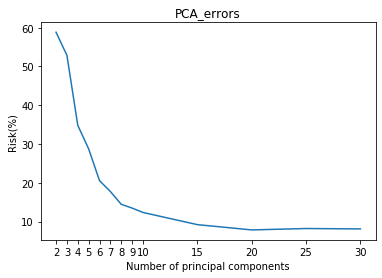

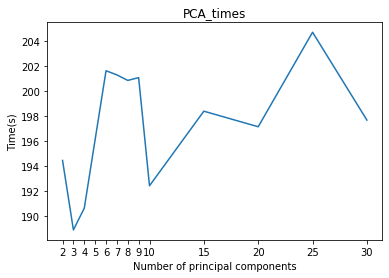

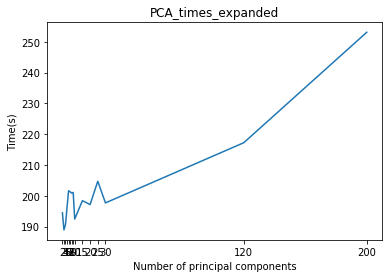

In [71]:
import matplotlib.pyplot as plt

def plot_PCA_linegraph(error_vec, x_axis, name="Errorplot", xlabel='x', ylabel='y'):
    k = x_axis
    plt.plot(k, error_vec)
    plt.xticks(k)
    #plt.axis([1, len(error_vec), 0, 10])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(name)
    plt.savefig('{name}.eps'.format(name=name), format='eps', dpi=1200)
    plt.show()

x_axis = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30]
x_axis2 = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 120, 200]

plot_PCA_linegraph(errpca, x_axis, "PCA_errors", 'Number of principal components', 'Risk(%)')
plot_PCA_linegraph(durpca, x_axis, "PCA_times", 'Number of principal components', 'Time(s)')
plot_PCA_linegraph(durpca2, x_axis2, "PCA_times_expanded", 'Number of principal components', 'Time(s)')



In [61]:
with open("errors.txt", "w") as f:
    for s in errpca:
        f.write(str(s) +"\n")

with open("times.txt", "w") as f:
    for s in durpca:
        f.write(str(s) +"\n")
        
#with open("file.txt", "r") as f:
#  for line in f:
#    score.append(int(line.strip()))